# Zadanie 1

## a)

In [8]:
import numpy as np
import math
def prime(n):
    if n == 1:
        return False
    for i in range(2, math.ceil(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

In [10]:
print(prime(3))
print(prime(4))
print(prime(49))

True
False
False


## b)

In [3]:
def select_primes(x):
    # tworzę nową listę do której będę dodawać liczby pierwsze
    list_primes = []
    for i in range(0, len(x)):
        if prime(x[i]):
            list_primes.append(x[i])
            # dodaje do listy liczby pierwsze
    return list_primes

In [4]:
select_primes([3, 6, 11, 25, 19])

[3, 11, 19]

# Zadanie 2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
miasta = pd.read_csv('miasta.csv')

In [7]:
miasta

,Rok,Gdansk,Poznan,Szczecin
0,1900,170,110,210
1,1925,210,220,254
2,1939,250,274,287
3,1946,117,267,72
4,1950,194,320,178
5,1960,286,408,269
6,1970,365,471,338
7,1980,456,552,388
8,1990,465,590,413
9,2000,462,574,416


In [8]:
# czyste wartości
miasta.values

array([[1900,  170,  110,  210],
       [1925,  210,  220,  254],
       [1939,  250,  274,  287],
       [1946,  117,  267,   72],
       [1950,  194,  320,  178],
       [1960,  286,  408,  269],
       [1970,  365,  471,  338],
       [1980,  456,  552,  388],
       [1990,  465,  590,  413],
       [2000,  462,  574,  416]], dtype=int64)

### b)

In [9]:
new_values = [2010,460,555,405]
# wprowadzenie nowych wartości jako ostatni wiersz
miasta.loc[len(miasta)] = new_values
miasta

,Rok,Gdansk,Poznan,Szczecin
0,1900,170,110,210
1,1925,210,220,254
2,1939,250,274,287
3,1946,117,267,72
4,1950,194,320,178
5,1960,286,408,269
6,1970,365,471,338
7,1980,456,552,388
8,1990,465,590,413
9,2000,462,574,416


### c)

Text(0, 0.5, 'Liczba ludności [w tys.]')

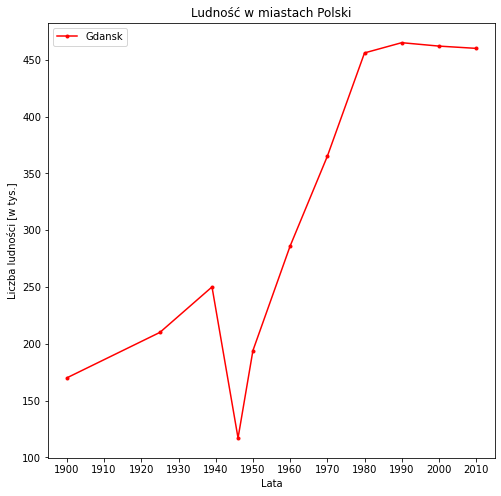

In [10]:
import numpy as np
miasta.plot(x = 'Rok', y = 'Gdansk',kind = 'line', c = 'r', figsize = (8,8), style = '.-')
plt.xlim(1895, 2015)
plt.xticks(np.arange(1900, 2020, 10))
plt.title('Ludność w miastach Polski')
plt.xlabel('Lata')
plt.ylabel('Liczba ludności [w tys.]')

### d)

Text(0, 0.5, 'Liczba ludności [w tys.]')

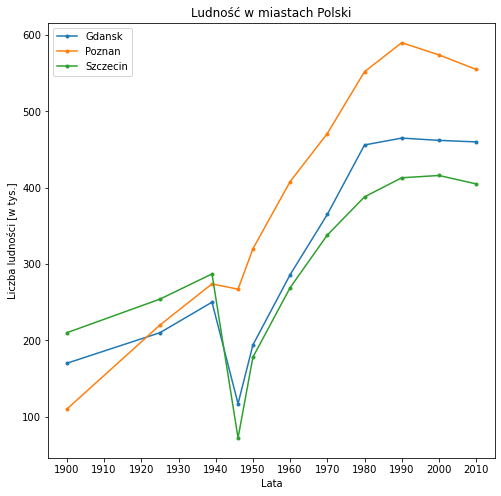

In [11]:
miasta.plot(x = 'Rok', figsize = (8,8), style = '.-')
plt.xlim(1895, 2015)
plt.xticks(np.arange(1900, 2020, 10))
plt.title('Ludność w miastach Polski')
plt.xlabel('Lata')
plt.ylabel('Liczba ludności [w tys.]')

### e)

In [12]:
from sklearn.preprocessing import StandardScaler
# poprzez StandardScaler
ss = StandardScaler()
miastas = ss.fit_transform(miasta)

In [13]:
miastas

array([[-1.92149899, -1.11719159, -1.80098925, -0.78708066],
       [-1.13282403, -0.80309299, -1.10498255, -0.37300779],
       [-0.69116606, -0.4889944 , -0.76330653, -0.06245314],
       [-0.47033707, -1.53337222, -0.80759786, -2.08576376],
       [-0.34414907, -0.92873243, -0.47224918, -1.08822457],
       [-0.02867909, -0.20630567,  0.08455619, -0.23184659],
       [ 0.28679089,  0.41403905,  0.48317821,  0.41749496],
       [ 0.60226088,  1.12861335,  0.99569224,  0.88803231],
       [ 0.91773086,  1.19928554,  1.23613092,  1.12330099],
       [ 1.23320085,  1.17572814,  1.13489358,  1.15153323],
       [ 1.54867083,  1.16002321,  1.01467424,  1.04801501]])

In [14]:
# srednia
np.mean(miastas)

-5.702509171938304e-16

In [15]:
np.round(np.mean(miastas), 5)

-0.0

In [16]:
# odchylenie
np.std(miastas)

1.0

In [17]:
# reczny sposob
miastas2 = miasta.copy()
# kopiuje dataframe, aby zapisać do niej otrzymany wynik
for i in miasta.columns:
    mean = np.mean(miasta[i])
    std = np.std(miasta[i])
    miastas2[i] = (miasta[i] - mean) / std

In [31]:
miastas22 = miasta.copy()
miastas22 = (miastas22 - miastas22.mean()) / miastas22.std()
miastas22

,Rok,Gdansk,Poznan,Szczecin
0,-1.832077,-1.065200,-1.717176,-0.750452
1,-1.080105,-0.765719,-1.053560,-0.355649
2,-0.659001,-0.466238,-0.727784,-0.059547
3,-0.448449,-1.462013,-0.770014,-1.988698
4,-0.328133,-0.885512,-0.450272,-1.037581
5,-0.027344,-0.196705,0.080621,-0.221057
6,0.273444,0.394771,0.460692,0.398066
7,0.574233,1.076091,0.949355,0.846706
8,0.875022,1.143474,1.178605,1.071025
9,1.175811,1.121013,1.082079,1.097944


In [18]:
miastas2

,Rok,Gdansk,Poznan,Szczecin
0,-1.921499,-1.117192,-1.800989,-0.787081
1,-1.132824,-0.803093,-1.104983,-0.373008
2,-0.691166,-0.488994,-0.763307,-0.062453
3,-0.470337,-1.533372,-0.807598,-2.085764
4,-0.344149,-0.928732,-0.472249,-1.088225
5,-0.028679,-0.206306,0.084556,-0.231847
6,0.286791,0.414039,0.483178,0.417495
7,0.602261,1.128613,0.995692,0.888032
8,0.917731,1.199286,1.236131,1.123301
9,1.233201,1.175728,1.134894,1.151533


In [19]:
miastas2.mean()

Rok        -2.644349e-15
Gdansk      1.614870e-16
Poznan      1.413011e-16
Szczecin    6.055762e-17
dtype: float64

In [20]:
miastas2.std()

Rok         1.048809
Gdansk      1.048809
Poznan      1.048809
Szczecin    1.048809
dtype: float64

### f)

In [21]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
miastam2 = minmax.fit_transform(miasta)

In [22]:
miastam2

array([[0.        , 0.15229885, 0.        , 0.40116279],
       [0.22727273, 0.26724138, 0.22916667, 0.52906977],
       [0.35454545, 0.38218391, 0.34166667, 0.625     ],
       [0.41818182, 0.        , 0.32708333, 0.        ],
       [0.45454545, 0.22126437, 0.4375    , 0.30813953],
       [0.54545455, 0.48563218, 0.62083333, 0.57267442],
       [0.63636364, 0.71264368, 0.75208333, 0.77325581],
       [0.72727273, 0.97413793, 0.92083333, 0.91860465],
       [0.81818182, 1.        , 1.        , 0.99127907],
       [0.90909091, 0.99137931, 0.96666667, 1.        ],
       [1.        , 0.98563218, 0.92708333, 0.96802326]])

In [23]:
# minimum
miastam2.min()

0.0

In [24]:
# maximum
miastam2.max()

1.0

In [25]:
# ręczny sposób
miastam = miasta.copy()
for i in miasta.columns:
    miastam[i] = (miasta[i] - miasta.min()[i]) / (miasta.max()[i] - miasta.min()[i])

In [26]:
miastam

,Rok,Gdansk,Poznan,Szczecin
0,0.000000,0.152299,0.000000,0.401163
1,0.227273,0.267241,0.229167,0.529070
2,0.354545,0.382184,0.341667,0.625000
3,0.418182,0.000000,0.327083,0.000000
4,0.454545,0.221264,0.437500,0.308140
5,0.545455,0.485632,0.620833,0.572674
6,0.636364,0.712644,0.752083,0.773256
7,0.727273,0.974138,0.920833,0.918605
8,0.818182,1.000000,1.000000,0.991279
9,0.909091,0.991379,0.966667,1.000000


In [27]:
# min recznie obliczonym sposobem
miastam.min()

Rok         0.0
Gdansk      0.0
Poznan      0.0
Szczecin    0.0
dtype: float64

In [28]:
# max recznie obliczonym sposobem
miastam.max()

Rok         1.0
Gdansk      1.0
Poznan      1.0
Szczecin    1.0
dtype: float64